# Prédiction du prix des voitures à travers une application Web
À partir des données concernant les voitures, faisons un modèle de Machine Learning permettant de prédire le prix des voitures et déployer ce modèle.

## 1. Lecture de données

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv("car_price_prediction.csv")
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931 km,4,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6,Automatic,4x4,04-May,Left wheel,Silver,12


In [31]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage              object
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [32]:
df.describe()

,ID,Price,Prod. year,Engine volume,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,2.307990,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,0.877805,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,0.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,1.800000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,2.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,2.500000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,20.000000,16.000000,16.000000


## 2. Analyse Exploratoire et Visualisation des données

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns



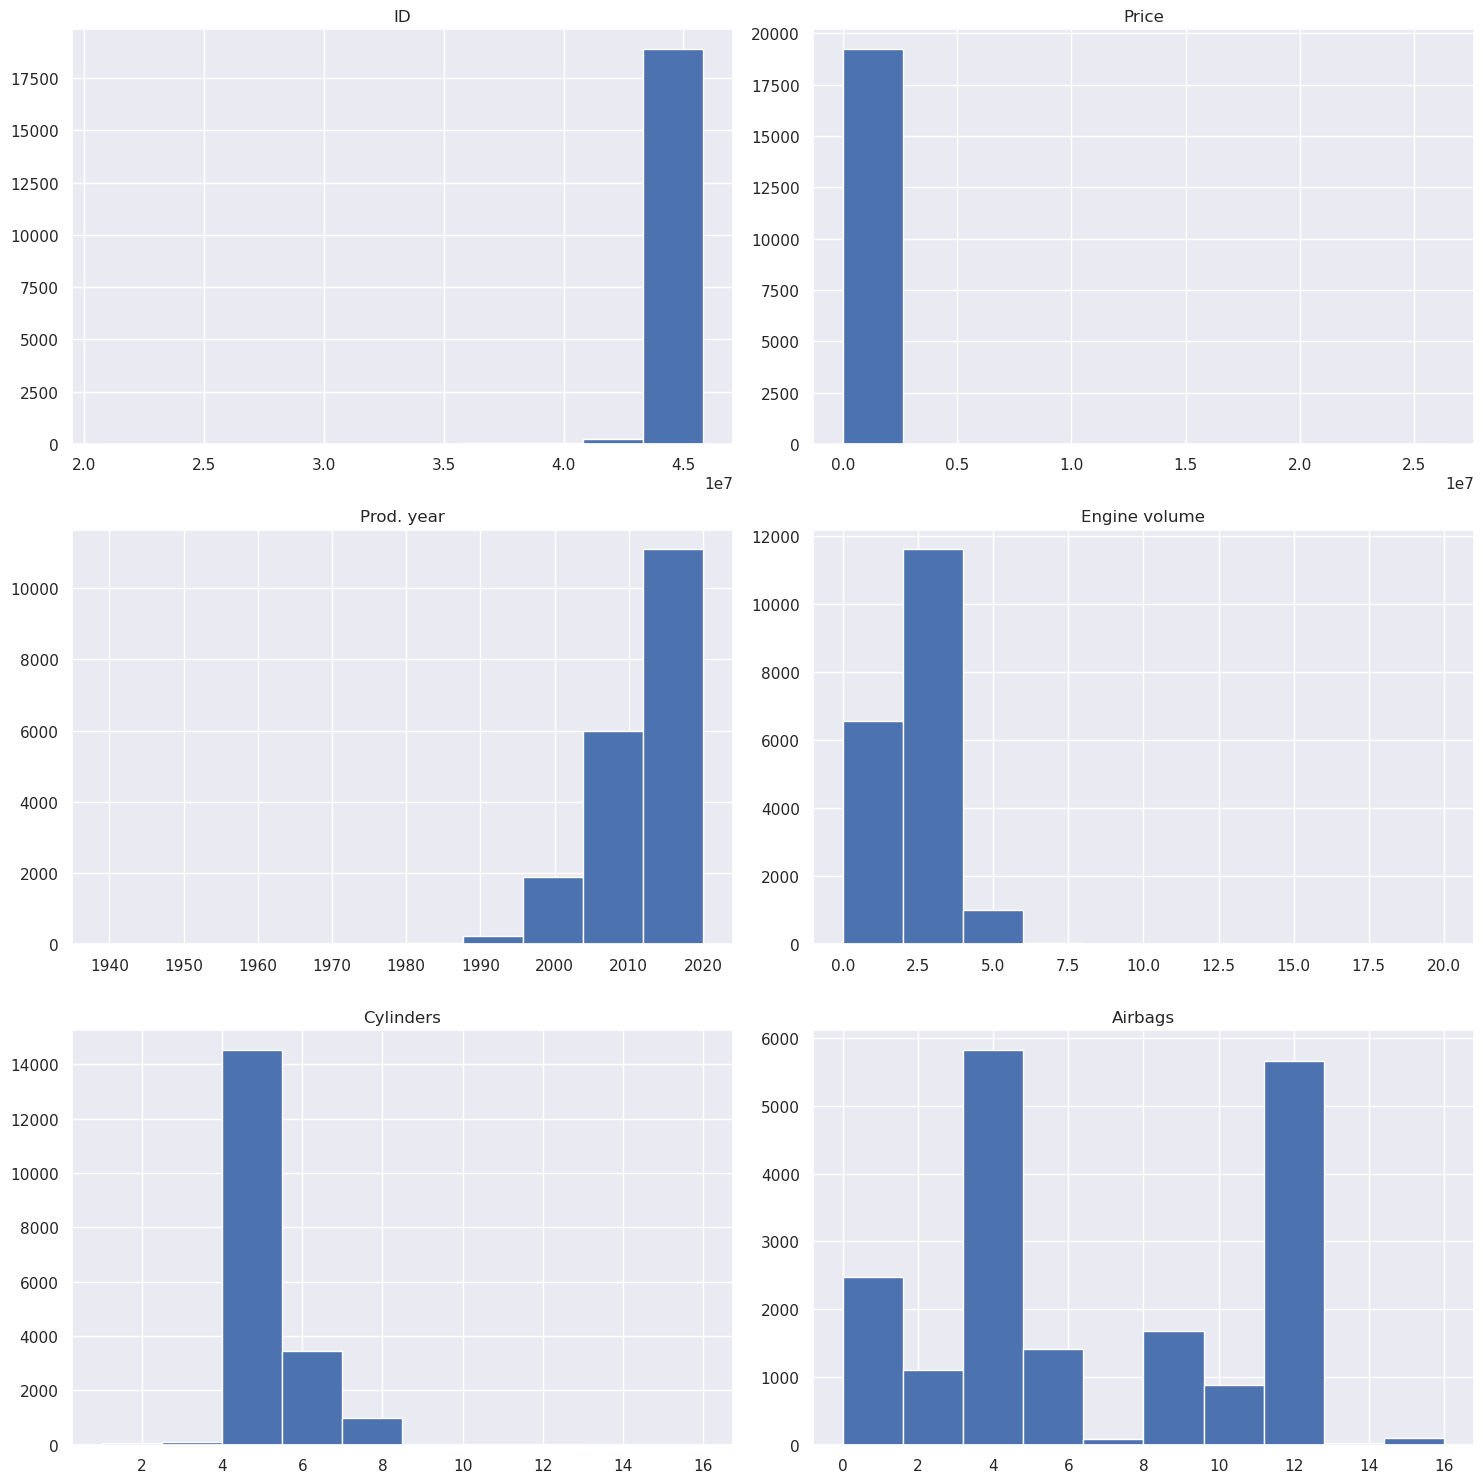

In [34]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

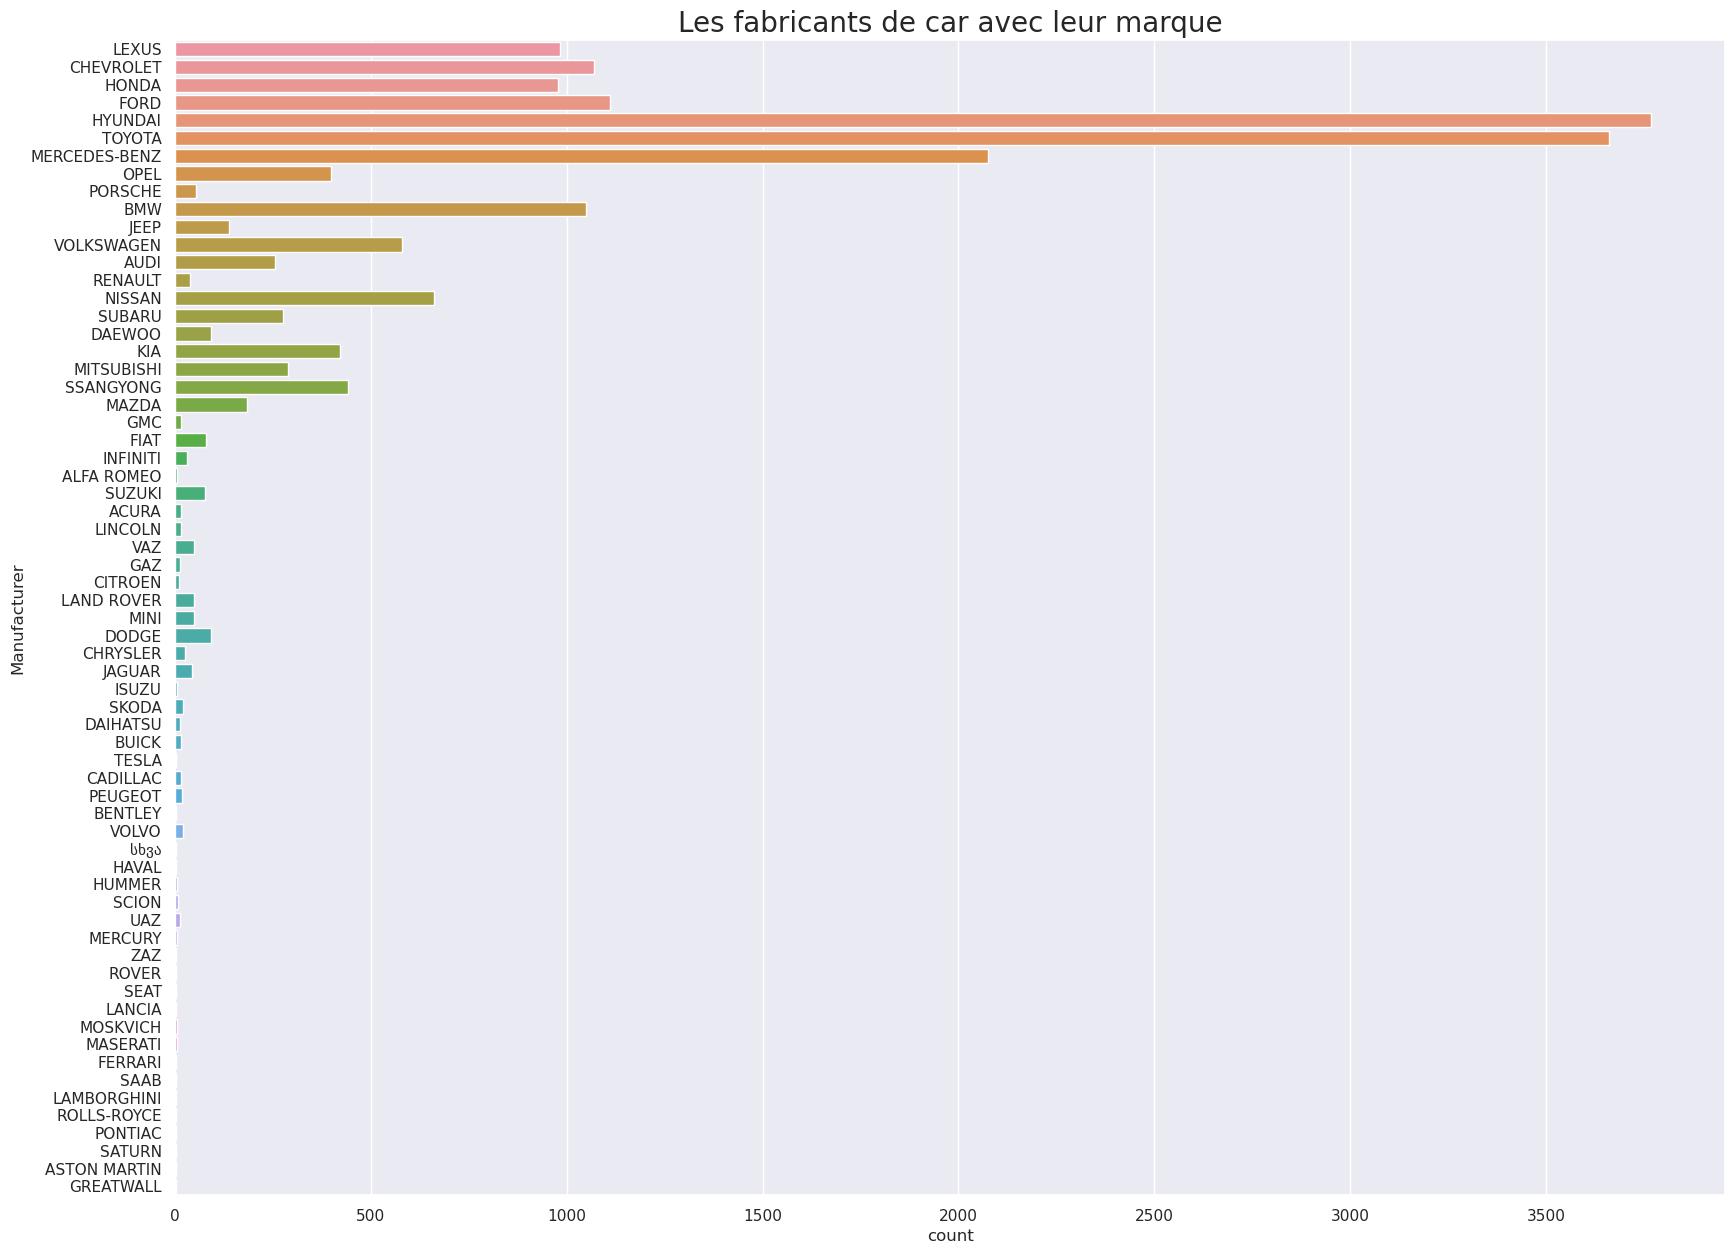

In [35]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df['Manufacturer'])
plt.title("Les fabricants de car avec leur marque", fontsize = 20)
plt.show()

In [36]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4


Supprimons la colonne ID

In [37]:
df.drop('ID', inplace=True, axis=1)

In [38]:
"""df.drop('Doors', inplace=True, axis=1)
df.drop('Category', inplace=True, axis=1)    
df.drop('Leather interior', inplace=True, axis=1)
#df.drop('Cylinders', inplace=True, axis=1)


"""

"df.drop('Doors', inplace=True, axis=1)\ndf.drop('Category', inplace=True, axis=1)    \ndf.drop('Leather interior', inplace=True, axis=1)\n#df.drop('Cylinders', inplace=True, axis=1)\n\n\n"

In [39]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4


In [40]:
columns = df.columns.tolist()


In [41]:
df["Mileage"] = df["Mileage"].astype(str)
df["Mileage"] = df["Mileage"].str.replace("km", "")
df["Mileage"] = df["Mileage"].str.replace(",", ".")
df["Mileage"] = df["Mileage"].astype(float)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4,Automatic,Front,04-May,Left wheel,Black,4


In [42]:
df['Model'].unique

<bound method Series.unique of 0         RX 450
1        Equinox
2            FIT
3         Escape
4            FIT
          ...   
19232    CLK 200
19233     Sonata
19234     Tucson
19235    Captiva
19236     Sonata
Name: Model, Length: 19237, dtype: object>

In [43]:
#df = df[df["Manufacturer"].str.contains("სხვა") ==False]
df = df[df["Levy"].str.contains("-") ==False]

In [44]:

#df = df.replace(to_replace="-",value=0)
df['Levy']=df['Levy'].astype("float")

In [45]:
df.dtypes

Price                 int64
Levy                float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage             float64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

Déclarons une variable appelée df2 qui va recevoir df

In [46]:
"""from sklearn import preprocessing
for col in df2.columns :
    if df2[col].dtype == 'object':
        df2 = pd.get_dummies(df2, columns=[col])
        
df2.head()"""

"from sklearn import preprocessing\nfor col in df2.columns :\n    if df2[col].dtype == 'object':\n        df2 = pd.get_dummies(df2, columns=[col])\n        \ndf2.head()"

In [47]:
for col in df.columns :
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
        
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,26,629,2010,4,1,2,3.5,186005.0,6,0,0,1,0,12,12
1,16621,1018.0,6,313,2011,4,0,4,3.0,192000.0,6,2,0,1,0,1,8
3,3607,862.0,14,316,2011,4,1,2,2.5,168966.0,4,0,0,1,0,14,0
4,11726,446.0,17,331,2014,3,1,4,1.3,91901.0,4,0,1,1,0,12,4
5,39493,891.0,19,652,2016,4,1,1,2.0,160931.0,4,0,1,1,0,14,4


In [48]:
#df.head()

In [49]:
"""plt.figure(figsize=(16,38))

for i, col in enumerate(columns, 1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], color = '#d1aa00', fill = True, warn_singular=False)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout()
plt.show()
"""

"plt.figure(figsize=(16,38))\n\nfor i, col in enumerate(columns, 1):\n    plt.subplot(8,4,i)\n    sns.kdeplot(df[col], color = '#d1aa00', fill = True, warn_singular=False)\n    plt.subplot(8,4,i+11)\n    df[col].plot.box()\nplt.tight_layout()\nplt.show()\n"

In [50]:
pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
skewness,8.617555,5.449954,0.170889,-0.034358,-1.036890,-0.229088,-2.024064,-0.345431,2.559402,95.003074,2.269514,2.298230,-0.256292,-5.113379,6.316788,-0.186085,-0.023363
kurtosis,297.566483,85.727144,-1.064719,-1.205897,7.128399,-1.537528,2.097149,-1.595519,27.117056,9486.531518,6.296835,3.860205,0.640512,49.664534,37.907465,-1.655412,-1.457778


<Axes: >

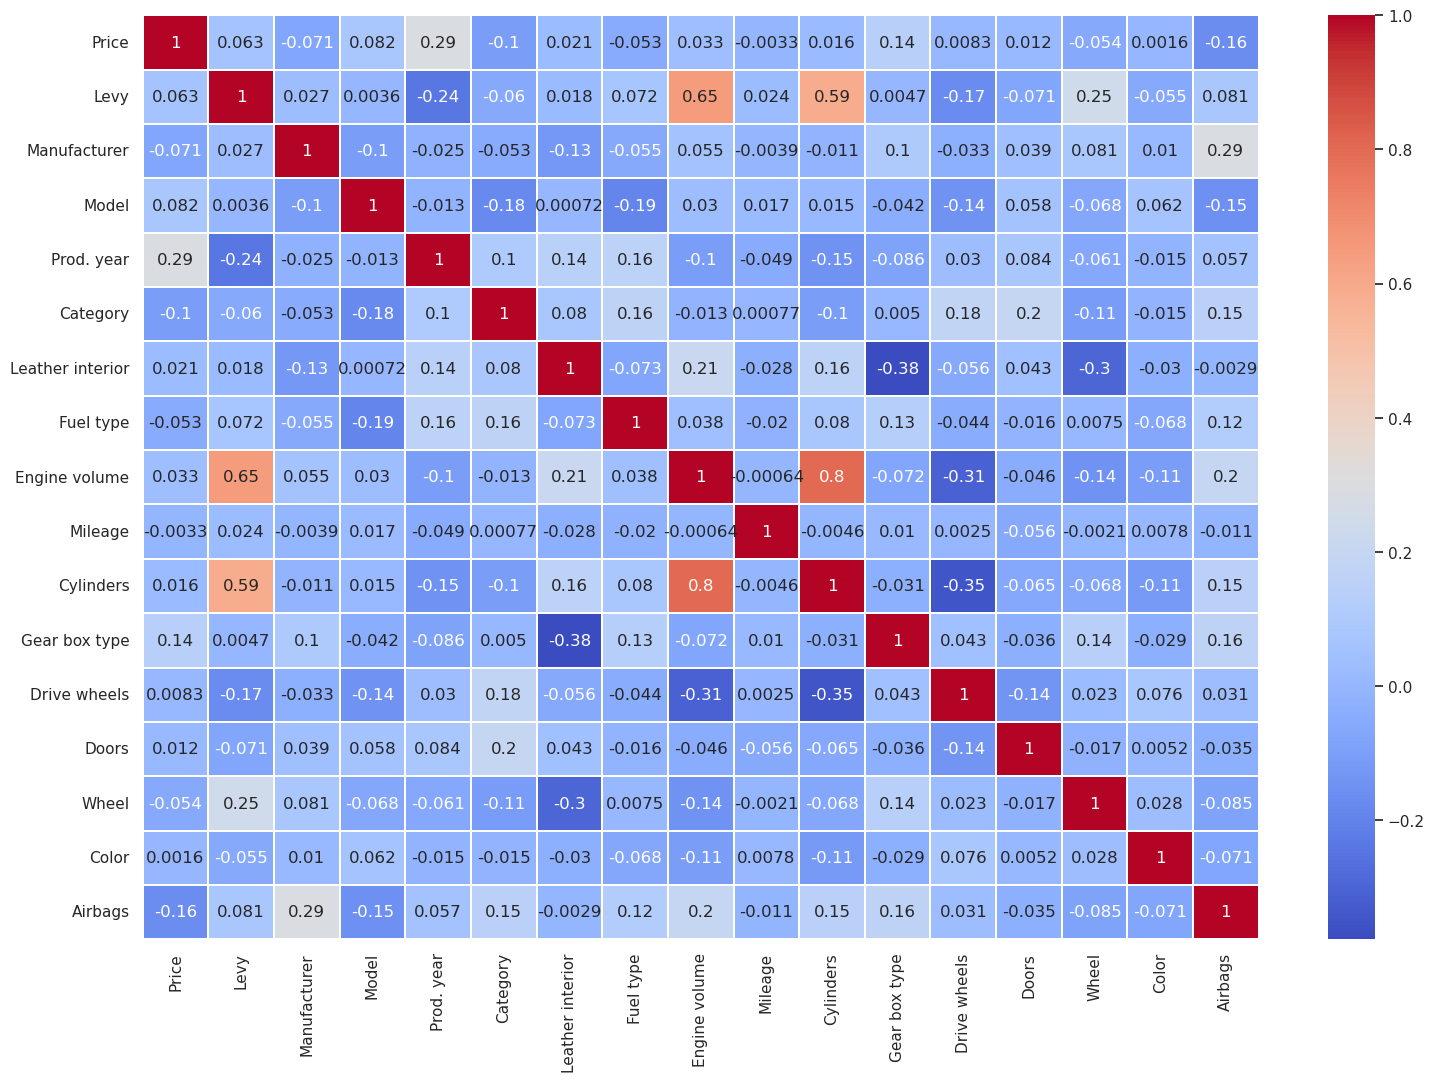

In [51]:
import seaborn as sns
f = plt.figure(figsize=(18,12))
sns.set()
sns.heatmap(df.corr(), linewidths=.2,annot=True,cmap='coolwarm')

Essayons de comprendre la matrice de corrélation 

In [52]:
cor = df.corr()
threshold = 0.5
a=abs(cor['Price'])
result = a[a>0.5]
result

Price    1.0
Name: Price, dtype: float64

Nous constatons qu'aucun feature n'a une corrélation supérieure à 0.5 avec le target Price

In [53]:
df.drop('Cylinders', inplace=True, axis=1)
#df.drop('Levy', inplace=True, axis=1)
#df.drop('Engine volume', inplace=True, axis=1)
#df.drop('Doors', inplace=True, axis=1)

In [54]:
"""df.drop('Levy', inplace=True, axis=1)
df.drop('Manufacturer', inplace=True, axis=1)
df.drop('Model', inplace=True, axis=1)
df.drop('Category', inplace=True, axis=1)
df.drop('Leather interior', inplace=True, axis=1)
df.drop('Fuel type', inplace=True, axis=1)
df.drop('Engine volume', inplace=True, axis=1)
df.drop('Mileage', inplace=True, axis=1)
df.drop('Cylinders', inplace=True, axis=1)
df.drop('Doors', inplace=True, axis=1)
df.drop('Drive wheels', inplace=True, axis=1)
df.drop('Color', inplace=True, axis=1)
df.drop('Wheel', inplace=True, axis=1)
df.drop('Airbags', inplace=True, axis=1)

#df.drop('ID', inplace=True, axis=1)"""

"df.drop('Levy', inplace=True, axis=1)\ndf.drop('Manufacturer', inplace=True, axis=1)\ndf.drop('Model', inplace=True, axis=1)\ndf.drop('Category', inplace=True, axis=1)\ndf.drop('Leather interior', inplace=True, axis=1)\ndf.drop('Fuel type', inplace=True, axis=1)\ndf.drop('Engine volume', inplace=True, axis=1)\ndf.drop('Mileage', inplace=True, axis=1)\ndf.drop('Cylinders', inplace=True, axis=1)\ndf.drop('Doors', inplace=True, axis=1)\ndf.drop('Drive wheels', inplace=True, axis=1)\ndf.drop('Color', inplace=True, axis=1)\ndf.drop('Wheel', inplace=True, axis=1)\ndf.drop('Airbags', inplace=True, axis=1)\n\n#df.drop('ID', inplace=True, axis=1)"

In [55]:
"""from sklearn import preprocessing
for col in df.columns :
    if df[col].dtype == 'object':
        #df[col] = df[col].astype('category')
        #df[col] = df[col].cat.codes
        df = pd.get_dummies(df, columns=[col])
        
df.head()"""

"from sklearn import preprocessing\nfor col in df.columns :\n    if df[col].dtype == 'object':\n        #df[col] = df[col].astype('category')\n        #df[col] = df[col].cat.codes\n        df = pd.get_dummies(df, columns=[col])\n        \ndf.head()"

In [56]:
"""import seaborn as sns
f = plt.figure(figsize=(18,12))
sns.set()
sns.heatmap(df.corr(), linewidths=.2,annot=True,cmap='coolwarm')"""

"import seaborn as sns\nf = plt.figure(figsize=(18,12))\nsns.set()\nsns.heatmap(df.corr(), linewidths=.2,annot=True,cmap='coolwarm')"

In [57]:
"""df = df[(z < 3).all(axis=1)]
df.shape"""

'df = df[(z < 3).all(axis=1)]\ndf.shape'

In [58]:
"""pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])"""

"pd.DataFrame(data=[df[columns].skew(),df[columns].kurtosis()],index=['skewness','kurtosis'])"

Maintenant, mettons le prix suivant une classe ( __Moins chèr,Moyen, Chèr et Très Chèr__).

In [59]:
def price_class(Price):
    if (Price >=1 and Price<=9278.965):
        return "Moins Cher"
    elif (Price > 9278.965 and Price<=1.855593e+04):
        return "Moyen"
    elif (Price >1.855593e+04  and Price<=27834.895):
        return "Cher"
    else:
        return "Tres Cher"

df['Classe'] = df['Price'].apply(price_class)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Classe
0,13328,1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12,Moyen
1,16621,1018.0,6,313,2011,4,0,4,3.0,192000.0,2,0,1,0,1,8,Moyen
3,3607,862.0,14,316,2011,4,1,2,2.5,168966.0,0,0,1,0,14,0,Moins Cher
4,11726,446.0,17,331,2014,3,1,4,1.3,91901.0,0,1,1,0,12,4,Moyen
5,39493,891.0,19,652,2016,4,1,1,2.0,160931.0,0,1,1,0,14,4,Tres Cher


In [60]:
df['Classe'].value_counts()

Moins Cher    4964
Moyen         3732
Tres Cher     2573
Cher          2149
Name: Classe, dtype: int64

Voyons graphiquement la répartition de __price__ en fonction du feature __Cylinders__

In [61]:
"""sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Cylinders'], label='Moins Cher')
sns.kdeplot(df.loc[df['Classe']=='Moyen','Cylinders'], label='Moyen')
sns.kdeplot(df.loc[df['Classe']=='Cher','Cylinders'], label='Cher')
sns.kdeplot(df.loc[df['Classe']=='Tres Cher','Cylinders'], label='Tres Cher')
plt.legend()
plt.show()"""

"sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Cylinders'], label='Moins Cher')\nsns.kdeplot(df.loc[df['Classe']=='Moyen','Cylinders'], label='Moyen')\nsns.kdeplot(df.loc[df['Classe']=='Cher','Cylinders'], label='Cher')\nsns.kdeplot(df.loc[df['Classe']=='Tres Cher','Cylinders'], label='Tres Cher')\nplt.legend()\nplt.show()"

Voyons graphiquement la répartition de __price__ en fonction du feature __Airbags__

In [62]:
"""sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Airbags'], label='Moins Cher')
sns.kdeplot(df.loc[df['Classe']=='Moyen','Airbags'], label='Moyen')
sns.kdeplot(df.loc[df['Classe']=='Cher','Airbags'], label='Cher')
sns.kdeplot(df.loc[df['Classe']=='Tres Cher','Airbags'], label='Tres Cher')
plt.legend()
plt.show()"""

"sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Airbags'], label='Moins Cher')\nsns.kdeplot(df.loc[df['Classe']=='Moyen','Airbags'], label='Moyen')\nsns.kdeplot(df.loc[df['Classe']=='Cher','Airbags'], label='Cher')\nsns.kdeplot(df.loc[df['Classe']=='Tres Cher','Airbags'], label='Tres Cher')\nplt.legend()\nplt.show()"

## 3. Traitement des Valeurs abbérrantes

Vérifions si notre dataset ne comporte pas de  valeurs nulles


In [63]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Classe              0
dtype: int64

In [64]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Classe              0
dtype: int64

In [65]:
df.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
19231     True
19233    False
19234    False
19235     True
19236    False
Length: 13418, dtype: bool

In [66]:
df.dropna(how='all', inplace=True)

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
#df.fillna(0, inplace=True)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Classe
0,13328,1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12,Moyen
1,16621,1018.0,6,313,2011,4,0,4,3.0,192000.0,2,0,1,0,1,8,Moyen
3,3607,862.0,14,316,2011,4,1,2,2.5,168966.0,0,0,1,0,14,0,Moins Cher
4,11726,446.0,17,331,2014,3,1,4,1.3,91901.0,0,1,1,0,12,4,Moyen
5,39493,891.0,19,652,2016,4,1,1,2.0,160931.0,0,1,1,0,14,4,Tres Cher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.0,35,219,2007,2,0,1,1.7,236000.0,1,1,1,0,0,4,Moins Cher
19230,470,645.0,45,574,2011,3,1,2,1.8,307325.0,0,1,1,0,12,12,Moins Cher
19233,15681,831.0,19,669,2011,8,1,4,2.4,161600.0,2,1,1,0,11,8,Moyen
19234,26108,836.0,19,726,2010,4,1,1,2.0,116365.0,0,1,1,0,7,4,Cher


In [69]:
df.shape

(10040, 17)

Visualisons de plus certains features :

In [70]:
"""sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Cylinders'], label='Moins Cher')
sns.kdeplot(df.loc[df['Classe']=='Moyen','Cylinders'], label='Moyen')
sns.kdeplot(df.loc[df['Classe']=='Cher','Cylinders'], label='Cher')
sns.kdeplot(df.loc[df['Classe']=='Tres Cher','Cylinders'], label='Tres Cher')
plt.legend()
plt.show()"""

"sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Cylinders'], label='Moins Cher')\nsns.kdeplot(df.loc[df['Classe']=='Moyen','Cylinders'], label='Moyen')\nsns.kdeplot(df.loc[df['Classe']=='Cher','Cylinders'], label='Cher')\nsns.kdeplot(df.loc[df['Classe']=='Tres Cher','Cylinders'], label='Tres Cher')\nplt.legend()\nplt.show()"

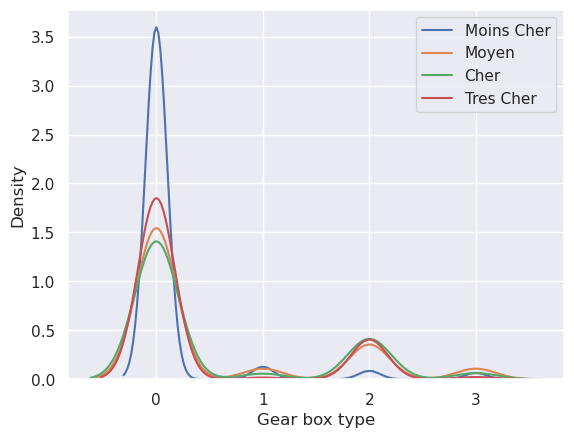

In [71]:
sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Gear box type'], label='Moins Cher')
sns.kdeplot(df.loc[df['Classe']=='Moyen','Gear box type'], label='Moyen')
sns.kdeplot(df.loc[df['Classe']=='Cher','Gear box type'], label='Cher')
sns.kdeplot(df.loc[df['Classe']=='Tres Cher','Gear box type'], label='Tres Cher')
plt.legend()
plt.show()

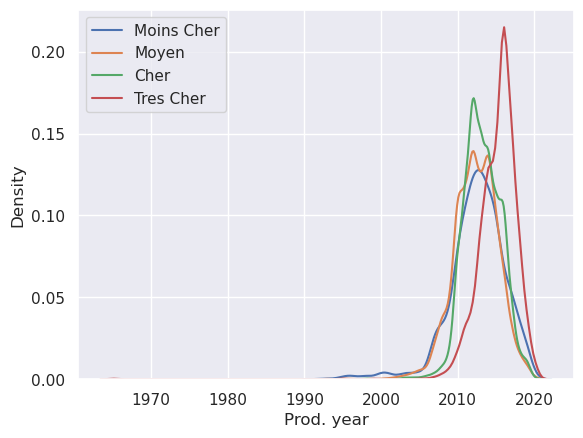

In [72]:
sns.kdeplot(df.loc[df['Classe']=='Moins Cher','Prod. year'], label='Moins Cher')
sns.kdeplot(df.loc[df['Classe']=='Moyen','Prod. year'], label='Moyen')
sns.kdeplot(df.loc[df['Classe']=='Cher','Prod. year'], label='Cher')
sns.kdeplot(df.loc[df['Classe']=='Tres Cher','Prod. year'], label='Tres Cher')
plt.legend()
plt.show()

In [73]:
"""df = df.drop(['Levy','Manufacturer','Model','Leather interior','Fuel type','Engine volume','Mileage','Cylinders',
              'Drive wheels','Wheel','Color','Gear box type','Category','Airbags'],axis=1)"""

"df = df.drop(['Levy','Manufacturer','Model','Leather interior','Fuel type','Engine volume','Mileage','Cylinders',\n              'Drive wheels','Wheel','Color','Gear box type','Category','Airbags'],axis=1)"

## 5. Entrainement du Modèle

In [74]:
X = df.drop(['Price','Classe'],axis=1)
#X = df.drop('Classe',axis=1)
#X=np.array(df.drop(['Price','Classe'],axis=1))
X


,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12
1,1018.0,6,313,2011,4,0,4,3.0,192000.0,2,0,1,0,1,8
3,862.0,14,316,2011,4,1,2,2.5,168966.0,0,0,1,0,14,0
4,446.0,17,331,2014,3,1,4,1.3,91901.0,0,1,1,0,12,4
5,891.0,19,652,2016,4,1,1,2.0,160931.0,0,1,1,0,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,1107.0,35,219,2007,2,0,1,1.7,236000.0,1,1,1,0,0,4
19230,645.0,45,574,2011,3,1,2,1.8,307325.0,0,1,1,0,12,12
19233,831.0,19,669,2011,8,1,4,2.4,161600.0,2,1,1,0,11,8
19234,836.0,19,726,2010,4,1,1,2.0,116365.0,0,1,1,0,7,4


In [75]:
#Y = np.array(df["Price"])
Y = df["Price"]

Y

0        13328
1        16621
3         3607
4        11726
5        39493
         ...  
19225     8781
19230      470
19233    15681
19234    26108
19236      470
Name: Price, Length: 10040, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [77]:
"""from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)"""

'from sklearn.preprocessing import LabelEncoder\nlabelencoder_Y = LabelEncoder()\nY = labelencoder_Y.fit_transform(Y)'

In [78]:
from sklearn.preprocessing import StandardScaler
"""sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

Importons les bibiliothèques nécéssaires

In [79]:
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Regression Linéaire.

In [80]:
classifier_LR = LinearRegression()
classifier_LR.fit(X_train, Y_train)
Y_pred = classifier_LR.predict(X_test)


In [81]:
print("Le score est  :")
r2_score(Y_test,Y_pred)
#classifier_LR.score(Y_test,Y_pred)
#accuracy_score(Y_test,Y_pred)

Le score est  :


0.17610114227306017

Le score est très faible,déterminons l'erreur.

In [82]:
print("Le prix predit est :\n")
print(classifier_LR.predict([[1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12]]),"\n")

print("Et le prix réel est :\n")
print(df['Price'][0])

Le prix predit est :

[53215686.01912359] 

Et le prix réel est :

13328


In [83]:
from sklearn.metrics import mean_squared_error
predictions = classifier_LR.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)

L'erreur  est :


438930520.5808245

### 5.2 KNeighbors Classifier

In [84]:
classifier_KN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier_KN.fit(X_train, Y_train)
Y_pred = classifier_KN.predict(X_test)


In [85]:
print("Le score est  :")
r2_score(Y_test,Y_pred)

Le score est  :


0.10914607140922661

In [86]:
print("le prix predit est :\n")

print(classifier_KN.predict([[1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12]]))
print("Et le prix réel est :\n")
print(df['Price'][0])

le prix predit est :

[2600]
Et le prix réel est :

13328


In [87]:

from sklearn.metrics import mean_squared_error
predictions = classifier_KN.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)


L'erreur  est :


474600704.8930943

## 5.7 Random Forest Classification algorithm


In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
classifier_RF = RandomForestClassifier(n_estimators = 100,max_features=7)
classifier_RF.fit(X_train, Y_train)
Y_pred = classifier_RF.predict(X_test)

In [504]:
print("Le score est  :")
r2_score(Y_test,Y_pred)

Le score est  :


0.5215625606258032

In [505]:
print("L'erreur  est:")
mean_squared_error(Y_test,Y_pred)


L'erreur  est:


254886619.10424966

In [511]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Classe
0,13328,1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12,Moyen
1,16621,1018.0,6,313,2011,4,0,4,3.0,192000.0,2,0,1,0,1,8,Moyen
3,3607,862.0,14,316,2011,4,1,2,2.5,168966.0,0,0,1,0,14,0,Moins Cher
4,11726,446.0,17,331,2014,3,1,4,1.3,91901.0,0,1,1,0,12,4,Moyen
5,39493,891.0,19,652,2016,4,1,1,2.0,160931.0,0,1,1,0,14,4,Tres Cher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107.0,35,219,2007,2,0,1,1.7,236000.0,1,1,1,0,0,4,Moins Cher
19230,470,645.0,45,574,2011,3,1,2,1.8,307325.0,0,1,1,0,12,12,Moins Cher
19233,15681,831.0,19,669,2011,8,1,4,2.4,161600.0,2,1,1,0,11,8,Moyen
19234,26108,836.0,19,726,2010,4,1,1,2.0,116365.0,0,1,1,0,7,4,Cher


In [512]:
print("le prix predit est")

print(classifier_RF.predict([[1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12]]))
print("Et le prix réel est :")
print(df['Price'][0])

le prix predit est
[6429]
Et le prix réel est :
13328


In [513]:

from sklearn.metrics import mean_squared_error
predictions = classifier_RF.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)


L'erreur  est :


254886619.10424966

## 5.6 Decision Tree Algorithm


In [514]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, Y_train)
Y_pred = classifier_DT.predict(X_test)


In [515]:
print("Le score est  :")

r2_score(Y_test,Y_pred)

Le score est  :


0.1142437884253934

In [516]:
print("le prix predit est :\n")
print(classifier_DT.predict([[1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12]]))

print("Et le prix réel est :\n")
print(df['Price'][0])

le prix predit est :

[11133]
Et le prix réel est :

13328


In [517]:

from sklearn.metrics import mean_squared_error
predictions = classifier_DT.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)


L'erreur  est :


471884906.0268924

## BaggingRegressor

In [518]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor(random_state=42)
bagging_reg.fit(X_train, Y_train)
Y_pred = bagging_reg.predict(X_test)

In [519]:
print("Le score est  :")

r2_score(Y_test,Y_pred)

Le score est  :


0.4145448961918424

In [520]:
print("le prix predit est :\n")
print(bagging_reg.predict([[1399.0,26,629,2010,4,1,2,3.5,186005.0,0,0,1,0,12,12]]))


print("Et le prix réel est : \n")
print(df['Price'][0])

le prix predit est :

[77116.8]
Et le prix réel est : 

13328


In [521]:

from sklearn.metrics import mean_squared_error
predictions = bagging_reg.predict(X_test)
print("L'erreur  est :")
mean_squared_error(predictions, Y_test)


L'erreur  est :


311900072.54067916

##  Gradient BoostClassifier

In [352]:
import joblib  
joblib.dump(model, "car_price_prediction.pkl")

NameError: name 'model' is not defined

In [ ]:
print(model.predict([[113,26,629,2010,4,1,2,52,186005.0,6.0,0,0,0,12,12]]))


In [ ]:
import pickle
with open ("car_price_prediction.pkl","wb") as file :
    pickle.dump(model,file)
    